In [5]:
curr_dir = f'/user_data/csimmon2/git_repos/ptoc'

import sys
sys.path.insert(0,curr_dir)
import matplotlib.pyplot as plt

import itertools
from nilearn import image, plotting, datasets
from nilearn.datasets import load_mni152_brain_mask, load_mni152_template
import nibabel as nib
import pdb
import os
import ptoc_params  as params
import seaborn as sns

#hide warning
import warnings
warnings.filterwarnings("ignore")


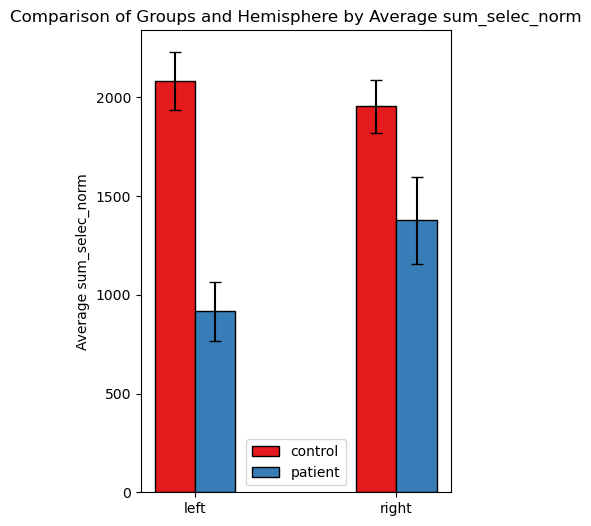

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#I need to figure out how to call the masked version of controls to compare to patients

# Load data from CSV file
data = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/results/selectivity/selectivity_summary.csv')

# Calculate the average of sum_selec_norm by group and hemi
group_hemi_means = data.groupby(['group', 'hemi'])['sum_selec_norm'].mean().unstack()
group_hemi_errors = data.groupby(['group', 'hemi'])['sum_selec_norm'].sem().unstack()

# Set color palette
palette = sns.color_palette('Set1')

# Set figure size
plt.figure(figsize=(4, 6))

# Plot bar chart with error bars
x = np.arange(len(group_hemi_means.columns))
bar_width = 0.2

for i, group in enumerate(group_hemi_means.index):
    plt.bar(x + i * bar_width, group_hemi_means.loc[group], width=bar_width, color=palette[i], edgecolor='black', yerr=group_hemi_errors.loc[group], capsize=4, label=group)

# Set x-axis tick labels
plt.xticks(x + (len(group_hemi_means.index) - 1) * bar_width / 2, group_hemi_means.columns)

# Set y-axis label
plt.ylabel('Average sum_selec_norm')

# Set plot title
plt.title('Comparison of Groups and Hemisphere by Average sum_selec_norm')

# Add legend
plt.legend()

# Show the plot
plt.show()


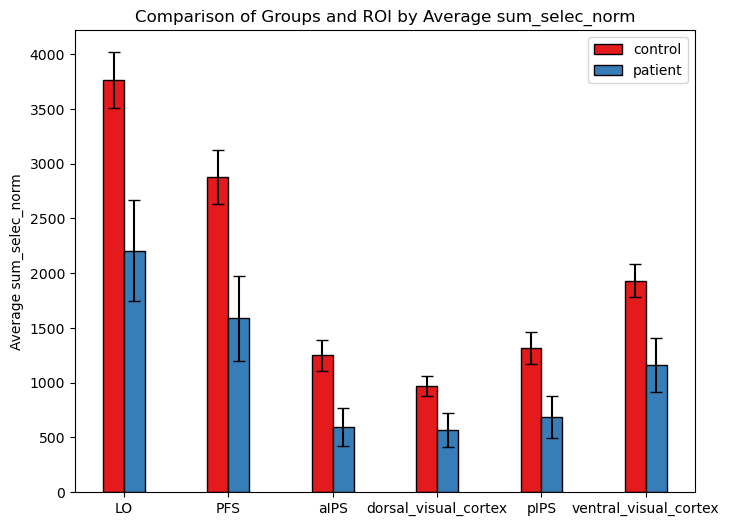

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data from CSV file
data = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/results/selectivity/selectivity_summary.csv')

# Calculate the average of sum_selec_norm by group and roi
group_roi_means = data.groupby(['group', 'roi'])['sum_selec_norm'].mean().unstack()
group_roi_errors = data.groupby(['group', 'roi'])['sum_selec_norm'].sem().unstack()

# Set color palette
palette = sns.color_palette('Set1')

# Set figure size
plt.figure(figsize=(8, 6))

# Plot bar chart with error bars
x = np.arange(len(group_roi_means.columns))
bar_width = 0.2

for i, group in enumerate(group_roi_means.index):
    plt.bar(x + i * bar_width, group_roi_means.loc[group], width=bar_width, color=palette[i], edgecolor='black', yerr=group_roi_errors.loc[group], capsize=4, label=group)

# Set x-axis tick labels
plt.xticks(x + (len(group_roi_means.index) - 1) * bar_width / 2, group_roi_means.columns)

# Set y-axis label
plt.ylabel('Average sum_selec_norm')

# Set plot title
plt.title('Comparison of Groups and ROI by Average sum_selec_norm')

# Add legend
plt.legend()

# Show the plot
plt.show()


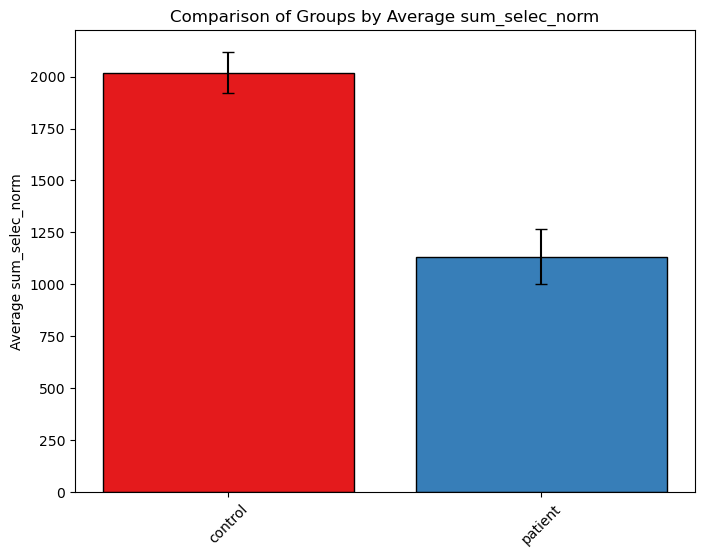

In [31]:
# Load data from CSV file
data = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/results/selectivity/selectivity_summary.csv')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the average of sum_selec_norm by group
group_means = data.groupby('group')['sum_selec_norm'].mean()

# Calculate the standard error of sum_selec_norm by group
group_errors = data.groupby('group')['sum_selec_norm'].sem()

# Set color palette
palette = sns.color_palette('Set1')

# Set figure size
plt.figure(figsize=(8, 6))

# Plot bar chart with error bars
plt.bar(group_means.index, group_means, color=palette, edgecolor='black', yerr=group_errors, capsize=4)

# Set x-axis tick labels
plt.xticks(rotation=45)

# Set y-axis label
plt.ylabel('Average sum_selec_norm')

# Set plot title
plt.title('Comparison of Groups by Average sum_selec_norm')

# Show the plot
plt.show()


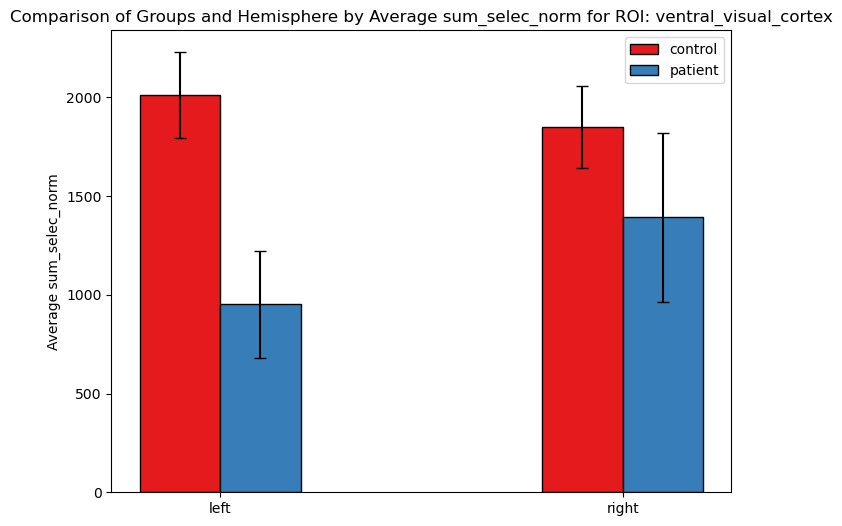

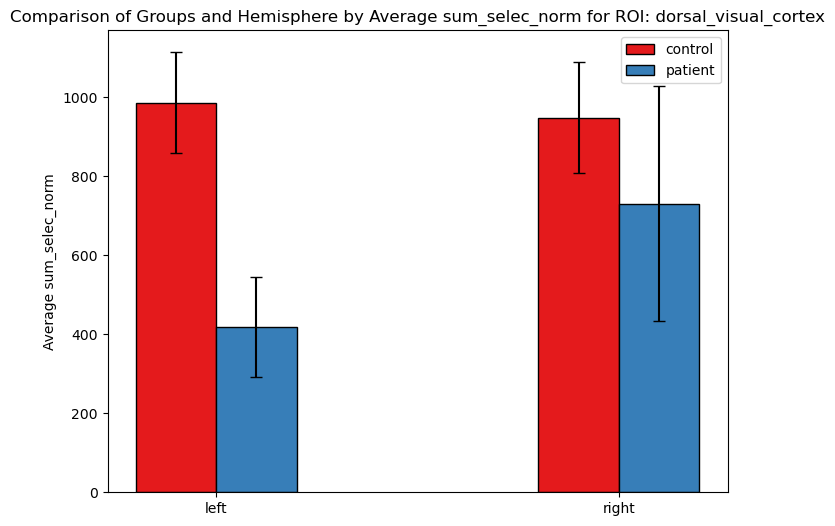

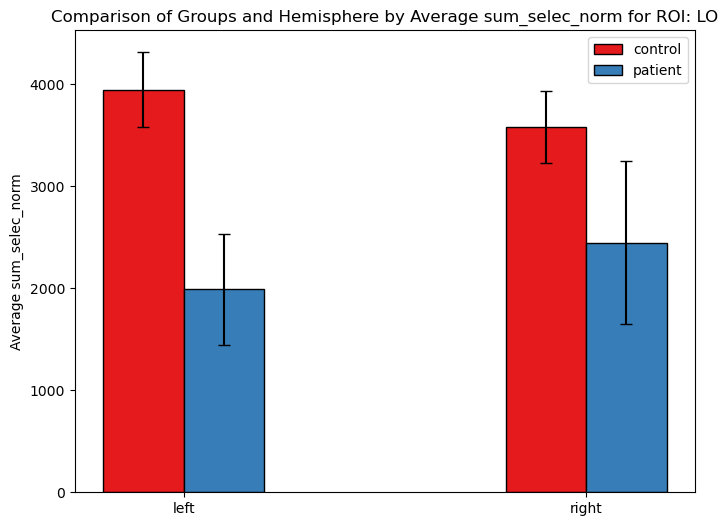

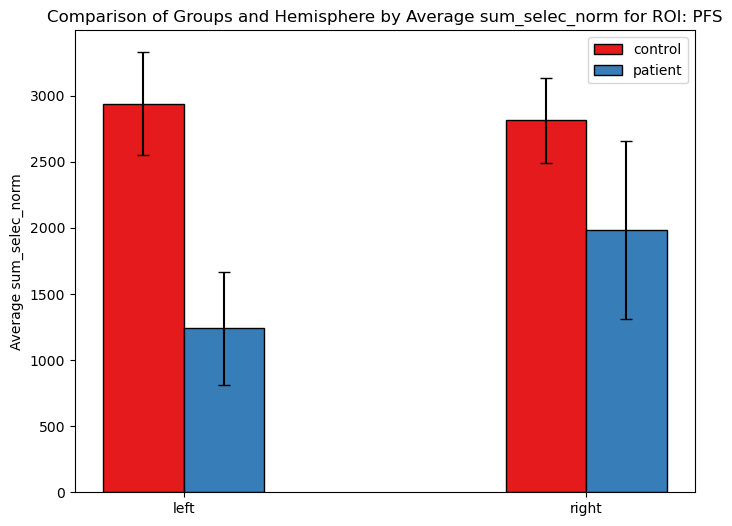

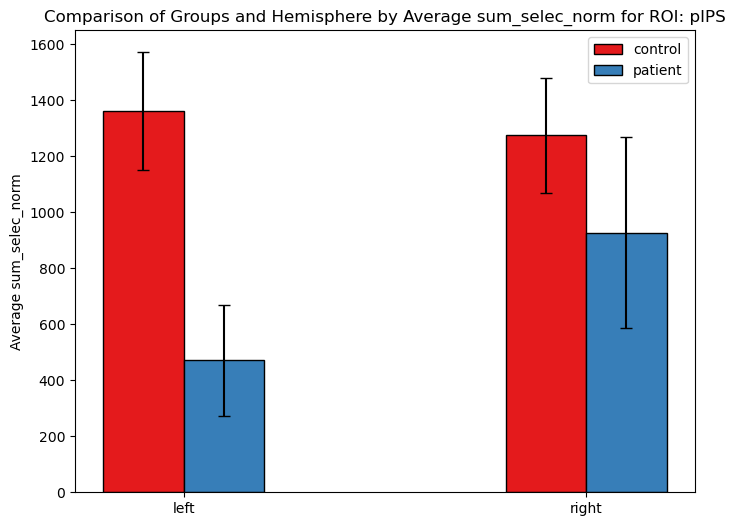

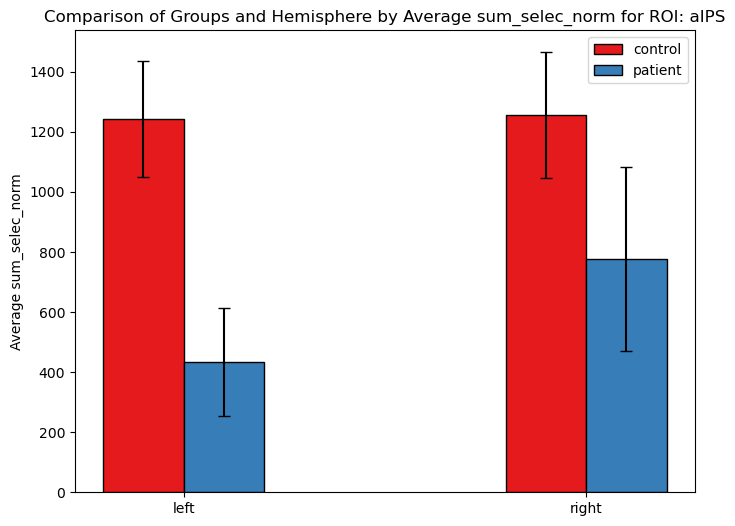

In [32]:
# Load data from CSV file
data = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/results/selectivity/selectivity_summary.csv')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Get unique ROIs
rois = data['roi'].unique()

# Set color palette
palette = sns.color_palette('Set1')

# Define colors for left and right hemispheres
left_color = palette[0]
right_color = palette[1]

# Iterate through ROIs
for roi in rois:
    # Filter data for the current ROI
    roi_data = data[data['roi'] == roi]
    
    # Calculate the average of sum_selec_norm by group and hemi
    group_hemi_means = roi_data.groupby(['group', 'hemi'])['sum_selec_norm'].mean().unstack()
    group_hemi_errors = roi_data.groupby(['group', 'hemi'])['sum_selec_norm'].sem().unstack()
    
    # Set figure size
    plt.figure(figsize=(8, 6))
    
    # Plot bar chart with error bars
    x = np.arange(len(group_hemi_means.columns))
    bar_width = 0.2
    
    for i, group in enumerate(group_hemi_means.index):
        plt.bar(x + i * bar_width, group_hemi_means.loc[group], width=bar_width, color=palette[i], edgecolor='black', yerr=group_hemi_errors.loc[group], capsize=4, label=group)
    
    # Set x-axis tick labels
    plt.xticks(x + (len(group_hemi_means.index) - 1) * bar_width / 2, group_hemi_means.columns)
    
    # Set y-axis label
    plt.ylabel('Average sum_selec_norm')
    
    # Set plot title
    plt.title(f'Comparison of Groups and Hemisphere by Average sum_selec_norm for ROI: {roi}')
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()

